<h1><center>Introduction to wind farm modelling with FOXES</h1>

<h3><center>Balthazar Sengers, balthazar.sengers@iwes.fraunhofer.de</h3>
<h3><center>30 April 2025</h3>

***

![foxes_logo](images/Logo_FOXES.svg)

## (1) Brief overview

Today we have a look at the wind farm and wake modelling software **FOXES**, which is an abbreviation for _Farm Optimization and eXtended yield Evaluation Software_. It has been developed by Fraunhofer IWES in Oldenburg and is open-source since 2022.
- Here is the source code: [https://github.com/FraunhoferIWES/foxes](https://github.com/FraunhoferIWES/foxes)
- Here is the documentation: [https://fraunhoferiwes.github.io/foxes.docs/index.html](https://fraunhoferiwes.github.io/foxes.docs/index.html)
- Here are some [examples](https://fraunhoferiwes.github.io/foxes.docs/examples.html)

The purpose of this software is to quickly calculate the power that is generated by large wind farms for long time series of incoming wind conditions, for example 30 years of half-hourly data. Also spatially varying wind fields are supported, as we shall see. The software **FOXES** can be helpful during wind farm planning, for example for finding the optimal wind turbine positions, as well as wind farm post-construction analysis.

Alternative open-source Python codes, doing very similar things: [PyWake](https://github.com/DTUWindEnergy/PyWake) by DTU, [FLORIS](https://github.com/NREL/floris) by NREL

## (2) The wake effect

Wind turbines convert the kinetic energy of the moving air parcels (wind) into electrical energy. 

Behind the rotor, an area of reduced wind speed and increased turbulence intensity develops, which is called the **wake** of the wind turbine. Downstream turbines that operate within the wake upstream turbines are then influenced by what is called the **wake effect**: They experience a lower wind speed and produce less power compared to what an isolated wind turbine would generate. 

The wake losses in wind farms are often in the range of 5-20 % of the annual energy production (AEP), which is a substantial reduction of profits for large wind farms. Wake effects cannot be fully avoided, but their minimization has been a hot topic for several decades.

![ani](images/ani.gif)

Here is another image of wakes, now for a more realistic turbine placing at an offshore site in the north sea:

![more wakes](images/more_wakes.png)

Wake effects are important within wind farms, but also on large scales - so called cluster wakes. Here is a radar image of the wind farms in the German Bight from 2018, showing wakes that visible even at distances of 50 km and more:

![cluster wakes](images/cluster_wakes.png)

## (3) Installation

Details of the installation of *FOXES* can be found [here](https://fraunhoferiwes.github.io/foxes.docs/installation.html) in the documentation.

1. First, create a new Python environment and enter it. Here it is called `foxes` and created at the path `~/venv/foxes`:
2. 
   ```console
    python -m venv ~/venv/foxes
    source ~/venv/foxes/bin/activate
   ```
   
    Always when first entering a new environment, it is always a good idea to update some very basic packages:
   
   ```console
    pip install pip wheel setuptools --upgrade
   ```
   
4. Now install the latest version of _FOXES_ by
   
   ```console
    pip install foxes
   ```

You exit the virtual environment by `deactivate`. Always enter it again whenever you wish to continue working: `source ~/venv/foxes/bin/activate`

## (4) How to run *FOXES*

Let's start by importing the required packages into this notebook, including *foxes*:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import foxes
import foxes.variables as FV
import foxes.constants as FC

### (4.1) Creating a wind farm

First, we create an empty wind farm and then subsequently add turbines to it:

In [3]:
farm = foxes.WindFarm(name="my_farm")
farm.add_turbine(foxes.Turbine(
    xy=np.array([0, 0]),
    turbine_models=["NREL5MW"]
))
farm.add_turbine(foxes.Turbine(
    xy=np.array([600, 0]),
    turbine_models=["NREL5MW"]
))
farm.add_turbine(foxes.Turbine(
    xy=np.array([300, 300]),
    turbine_models=["NREL5MW"]
))

Turbine 0, T0: xy=(0.00, 0.00), NREL5MW
Turbine 1, T1: xy=(600.00, 0.00), NREL5MW
Turbine 2, T2: xy=(300.00, 300.00), NREL5MW


Notice the `turbine_models=["NREL5MW"]` parameter. This is a list of model names that the turbine executes for each wind input state. Here `NREL5MW` corresponds to a wind turbine type with power and thrust curves as shown [here](https://fraunhoferiwes.github.io/foxes.docs/notebooks/data.html#NREL-5MW-D126-H90.csv) in the documentation. The data behind it is a CSV file, here this is `NREL-5MW-D126-H90.csv`.

Of course you can also provide your own power and thrust curve files and use them as turbine types, cf. the beginning of [this](https://fraunhoferiwes.github.io/foxes.docs/notebooks/single_row.html) example.

In the above the rotor diameter `D` and the hub height `H` are automatically extracted from the name of the power and thrust curve file. Alternatively, these values can be set explicitly as additional arguments when adding turbines.

Let's visualize the wind farm layout:

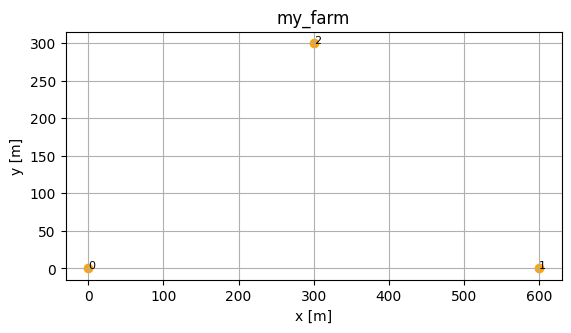

In [3]:
ax = foxes.output.FarmLayoutOutput(farm).get_figure()
plt.show()

There are many ways to add wind turbines to the wind farm, by CSV files, by pandas DataFrame objects, or regular rows or turbine arrays - see [this part](https://fraunhoferiwes.github.io/foxes.docs/api_input.html#foxes-input-farm-layout) of the online documentation. Here we add turbines at a regular grid to the above three turbines:

In [6]:
foxes.input.farm_layout.add_grid(
    farm, 
    xy_base=np.array([900, 300]),
    step_vectors=np.array([[600, 0], [0, 600]]),
    steps=[6, 3],
    turbine_models=["NREL5MW"]
)

Turbine 3, T3: xy=(900.00, 300.00), NREL5MW
Turbine 4, T4: xy=(900.00, 900.00), NREL5MW
Turbine 5, T5: xy=(900.00, 1500.00), NREL5MW
Turbine 6, T6: xy=(1500.00, 300.00), NREL5MW
Turbine 7, T7: xy=(1500.00, 900.00), NREL5MW
Turbine 8, T8: xy=(1500.00, 1500.00), NREL5MW
Turbine 9, T9: xy=(2100.00, 300.00), NREL5MW
Turbine 10, T10: xy=(2100.00, 900.00), NREL5MW
Turbine 11, T11: xy=(2100.00, 1500.00), NREL5MW
Turbine 12, T12: xy=(2700.00, 300.00), NREL5MW
Turbine 13, T13: xy=(2700.00, 900.00), NREL5MW
Turbine 14, T14: xy=(2700.00, 1500.00), NREL5MW
Turbine 15, T15: xy=(3300.00, 300.00), NREL5MW
Turbine 16, T16: xy=(3300.00, 900.00), NREL5MW
Turbine 17, T17: xy=(3300.00, 1500.00), NREL5MW
Turbine 18, T18: xy=(3900.00, 300.00), NREL5MW
Turbine 19, T19: xy=(3900.00, 900.00), NREL5MW
Turbine 20, T20: xy=(3900.00, 1500.00), NREL5MW


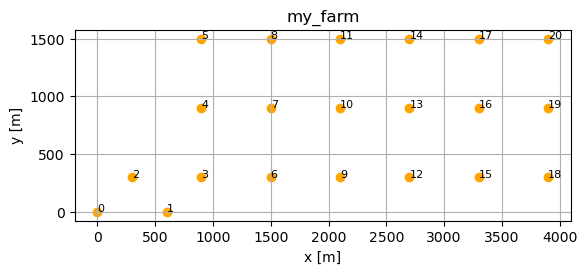

In [8]:
ax = foxes.output.FarmLayoutOutput(farm).get_figure()
plt.show()

### (4.2) Creating wind conditions

Wind and other atmospheric inflow conditions are called `States` in *FOXES* terminology. All quantities that are calculated directly from those conditions, i.e., ignoring any wake effects, are called `ambient` quantities. *FOXES* usually first calculates ambient results, and then, starting from those, waked results.

The available ambient states classes are described [here](https://fraunhoferiwes.github.io/foxes.docs/api_input.html#foxes-input-states) in the documentation. For example:
- A single state of homogeneous inflow conditions (no x, y, z or time dependencies): [SingleStateStates](https://fraunhoferiwes.github.io/foxes.docs/_foxes/input/states/SingleStateStates.html)
- Timeseries of homogeneous conditions (depends only on time): [Timeseries](https://fraunhoferiwes.github.io/foxes.docs/_foxes/input/states/Timeseries.html)
- Timeseries of height dependent conditions (depends on time, z): [MultiHeightStates](https://fraunhoferiwes.github.io/foxes.docs/_foxes/input/states/MultiHeightStates.html)
- Timeseries of heterogeneous conditions (depends on time, x, y, z): [FieldDataNC](https://fraunhoferiwes.github.io/foxes.docs/_foxes/input/states/FieldDataNC.html)
- Binned data with frequencies (called `weights`), like a wind rose (depends only on state index): [StatesTable](https://fraunhoferiwes.github.io/foxes.docs/_foxes/input/states/StatesTable.html)

Note that this list is not complete, but we won't consider others in this course. 

For our example, we create states that represent a typical wind rose at Bremen. The data is given by a simple csv file [wind_rose_bremen.csv](https://github.com/FraunhoferIWES/foxes/blob/main/foxes/data/states/wind_rose_bremen.csv) that is provided with *FOXES*. Notice the wind speed (ws), wind direction (wd) and frequency (weight) columns in the data, as well as the state index (state).

In [10]:
states = foxes.input.states.StatesTable(
    data_source="wind_rose_bremen.csv",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.WEIGHT: "weight"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

*FOXES* internally uses specific variable names, which are defined in the file [foxes.variables](https://github.com/FraunhoferIWES/foxes/blob/main/foxes/variables.py). We imported this file above under the name `FV`, by `import foxes.variables as FV`. 

Notice how the variable names appear in the above `StatesTable` constructor, e.g. `FV.WS` for wind speed. The argument `var2col` provides a mapping from *FOXES* variable names to column names. The argument `output_vars` specifies which data is to be provided by the states, and `fixed_vars` sets those to fixed values that are not provided by any of the columns.

It is good practise to always provide wind speed (FV.WS), wind direction (FV.WD), turbulence intensity (FV.TI) and air density (FV.RHO) by the ambient states, since some of the models that we will use during the calculation might depend on that input data (you are on the safe side with those four outputs).

### (4.3) Selecting models and creating the algorithm object

Our goal is to compute the power that each turbine in our wind farm generates in each of the 216 bins of the wind rose. Before we can do that, we have to select a couple of [models](https://fraunhoferiwes.github.io/foxes.docs/api_models.html#foxes-models) that define how exactly this should be done:
- [Rotor model](https://fraunhoferiwes.github.io/foxes.docs/api_models.html#foxes-models-rotor-models): Averaging of the ambient wind conditions over the rotor. For example, often the wind conditions are different at the lowest and the highest point of a rotor. This is not the case for our choice of ambient states, since the data of the above wind rose is homogeneous in space in each bin, so the `centre` model is the ideal choice. Alternatives for heterogeneous flows are `grid` rotors with points on a regular grid, or `level` rotors based on one vertical line, picking up the height dependency.
- [Wake models](https://fraunhoferiwes.github.io/foxes.docs/api_wake_models.html#foxes-models-wake-models): Wake models calculate the wake effect behind the rotor, dependent on the  point at which they are evaluated. There are many different models and parameter settings to choose from.
- [Wake frame](https://fraunhoferiwes.github.io/foxes.docs/api_models.html#foxes-models-wake-frames): Affects the path along which the wake propagates. The default choice is `rotor_wd`, meaning that the wakes are straight lines aligned with the wind direction at the wake causing rotor. In heterogeneous wind conditions, `streamlines` might be more realistic, resulting in bending wakes.
- [Partial wakes model](https://fraunhoferiwes.github.io/foxes.docs/api_models.html#foxes-models-partial-wakes): Often the wind turbines and the wind direction are not perfectly aligned. Then the wake only partially hits the rotor area of a downstream turbine. Partial wakes models describe how such situations should be calculated. One example is `rotor_points`, which calculates wake hits at the same points at which the ambient inflow data is averaged. Another choice is `None`, which tries to be more clever, dependent on the type of wake model that is being averaged.
- [Turbine models](https://fraunhoferiwes.github.io/foxes.docs/api_models.html#foxes-models-turbine-models): Once the rotor effective quantities like rotor effective wind speed (REWS) are computed, the turbine models are run and perform any kind of computation that is based on the currently available data at the turbine. For example, depending on the local wind conditions the turbine might switch off or switch to half power, etc.

Notice that turbine model choices are specified during the creation of the wind farm, while all other models will be selected next during the creation of the algorithm object, to be discussed next.

All models in *FOXES* are selected by their names, i.e., Python `str` type objects. The mapping from those name strings to actual model objects (instances of the model classes) is provided by the so-called [ModelBook](https://github.com/FraunhoferIWES/foxes/blob/main/foxes/models/model_book.py):

In [11]:
mbook = foxes.ModelBook()

We can have a look at the already defined models by:

In [12]:
mbook.print_toc()

axial_induction
---------------
Betz: BetzAxialInduction()
Madsen: MadsenAxialInduction()

farm_controllers
----------------
basic_ctrl: BasicFarmController()

farm_models
-----------
farm_PMask: Turbine2FarmModel(PowerMask(var_ws_P=REWS3, P_lim=100, induction=Betz))
farm_hubh_data: Turbine2FarmModel(RotorCentreCalc())
farm_kTI: Turbine2FarmModel(kTI(kTI=None, kb=0, ti_var=TI, k_var=k))
farm_kTI_amb: Turbine2FarmModel(kTI(kTI=None, kb=0, ti_var=AMB_TI, k_var=k))
farm_thrust2ct: Turbine2FarmModel(Thrust2Ct(thrust_var=T, var_ws_ct=REWS2))
farm_yaw2yawm: Turbine2FarmModel(YAW2YAWM())
farm_yawm2yaw: Turbine2FarmModel(YAWM2YAW())

ground_models
-------------
ground_mirror: GroundMirror()
no_ground: NoGround()

blh_mirror_h<height>: WakeMirror with
  height=(Boundary layer wake reflection height)
Example: blh_mirror_h500

partial_wakes
-------------
centre: PartialCentre()
rotor_points: RotorPoints()
top_hat: PartialTopHat()

axiwake<n>: PartialAxiwake with
  n=(Number of evaluation points)


Notice the long list of available models, and how most of those names just represent different parameter settings. It is possible to add more models to the model book, see [here](https://fraunhoferiwes.github.io/foxes.docs/notebooks/model_book.html) in the documentation.

The only thing that remains is the creation of an [Algorithm](https://fraunhoferiwes.github.io/foxes.docs/api_algorithms.html#foxes-algorithms) object. The default choice is [Downwind](https://fraunhoferiwes.github.io/foxes.docs/_foxes/algorithms/Downwind.html), which runs the computations in downwind order, i.e., each turbine is only evaluated once, including all relevant wake effects from upstream turbines. 

The algorithm is where all models, except the turbine models, are being selected:

In [13]:
algo = foxes.algorithms.Downwind(
    mbook=mbook,
    farm=farm,
    states=states,
    rotor_model="centre",
    wake_models=["Bastankhah2014_linear_k004"],
    wake_frame="rotor_wd",
    partial_wakes=None,
    engine='process',
    chunk_size_states = 1000,
    chunk_size_points = 4000,
)

Algorithm 'Downwind': Selecting engine 'ProcessEngine(n_procs=12, chunk_size_states=1000, chunk_size_points=4000)'


Notice the `chunks` argument, which specifies how many states (or points when computing an image) should be evaluated _simultaneously_. The fast speed of *foxes* calculations is due to the fact that there is no for-loop over the states in the code. Instead they are being chunked into blocks (here of size 1000 in case of the states), which are then evaluated in parallel. Each chunk is computed using numpy's ability to run vectorized operations on whole arrays, which is much faster than involving loops.

### (4.4) Running farm calculations

First, for reference we visualize the input data in a wind rose

ProcessEngine: Calculating 216 states for 1 turbines


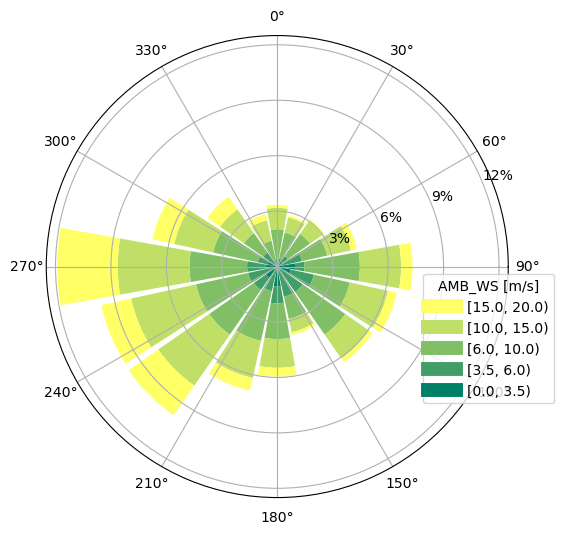

In [14]:
o = foxes.output.StatesRosePlotOutput(states, point=[0., 0., 100.])
fig = o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

With the farm, the states, the model book and the algorithm we are now in the position to run the wind farm calculations:

In [15]:
farm_results = algo.calc_farm()

Initializing model 'StatesTable_instance1'
States 'StatesTable_instance1': Reading file c:\Users\nuwaw\miniforge3\envs\wise2024\Lib\site-packages\foxes\data\states\wind_rose_bremen.csv

Initializing algorithm 'Downwind'

------------------------------------------------------------
  Algorithm: Downwind
  Running Downwind: calc_farm
------------------------------------------------------------
  n_states : 216
  n_turbines: 21
------------------------------------------------------------
  states   : StatesTable()
  rotor    : CentreRotor()
  controller: BasicFarmController()
  wake frame: RotorWD()
------------------------------------------------------------
  wakes:
    0) Bastankhah2014_linear_k004: Bastankhah2014(ws_linear, induction=Madsen, k=0.04)
------------------------------------------------------------
  partial wakes:
    0) Bastankhah2014_linear_k004: axiwake6, PartialAxiwake(n=6)
------------------------------------------------------------
  turbine models:
    0) NREL5MW: P

The final results are now stored in an object called `farm_results`, which is also a `Dataset` object:

In [16]:
farm_results

<xarray.Dataset> Size: 911kB
Dimensions:     (state: 216, turbine: 21)
Coordinates:
  * state       (state) int64 2kB 0 1 2 3 4 5 6 ... 209 210 211 212 213 214 215
Dimensions without coordinates: turbine
Data variables: (12/27)
    AMB_CT      (state, turbine) float64 36kB 0.995 0.995 0.995 ... 0.081 0.081
    AMB_P       (state, turbine) float64 36kB 109.1 109.1 109.1 ... 5e+03 5e+03
    AMB_REWS    (state, turbine) float64 36kB 3.5 3.5 3.5 3.5 ... 20.0 20.0 20.0
    AMB_REWS2   (state, turbine) float64 36kB 3.5 3.5 3.5 3.5 ... 20.0 20.0 20.0
    AMB_REWS3   (state, turbine) float64 36kB 3.5 3.5 3.5 3.5 ... 20.0 20.0 20.0
    AMB_RHO     (state, turbine) float64 36kB 1.225 1.225 1.225 ... 1.225 1.225
    ...          ...
    YAW         (state, turbine) float64 36kB 0.0 0.0 0.0 ... 350.0 350.0 350.0
    order       (state, turbine) int64 36kB 5 14 11 8 20 17 ... 0 9 1 12 15 18
    order_inv   (state, turbine) int64 36kB 4 9 18 17 10 20 1 ... 12 8 6 5 18 0
    order_ssel  (state, turbine) int64 36kB 0 0 0 0 0 0 ... 215 215 215 215 215
    weight      (state) float64 2kB 0.00158 0.00244 0.00319 ... 0.00061 0.00013
    tname       (turbine) <U3 252B 'T0' 'T1' 'T2' 'T3' ... 'T18' 'T19' 'T20'

Most of the `data_variables` have coordinates `(state, turbine)`, i.e., they are 2D arrays. The first axis represents index of the state, i.e., the bin of the wind rose. The second axis represents the turbine index in the wind farm. The data can be directly extracted by the name, e.g. `P` for power:

In [17]:
farm_results["P"]

<xarray.DataArray 'P' (state: 216, turbine: 21)> Size: 36kB
array([[ 109.09925458,  108.26405209,  109.09999991, ...,   53.7680417 ,
           0.        ,  109.1       ],
       [ 737.59993194,  735.52656986,  737.59999999, ...,  233.79002736,
         318.66309478,  737.6       ],
       [2144.84994226, 2139.8298237 , 2144.84999999, ...,  756.44309906,
        1011.88931728, 2144.85      ],
       ...,
       [5000.        , 5000.        , 5000.        , ..., 5000.        ,
        5000.        , 5000.        ],
       [5000.        , 5000.        , 5000.        , ..., 5000.        ,
        5000.        , 5000.        ],
       [5000.        , 5000.        , 5000.        , ..., 5000.        ,
        5000.        , 5000.        ]])
Coordinates:
  * state    (state) int64 2kB 0 1 2 3 4 5 6 7 ... 209 210 211 212 213 214 215
Dimensions without coordinates: turbine

You can also convert it to a numpy array:

In [18]:
P = farm_results["P"].to_numpy()
print(P)
print("Numpy shape:", P.shape)

[[ 109.09925458  108.26405209  109.09999991 ...   53.7680417
     0.          109.1       ]
 [ 737.59993194  735.52656986  737.59999999 ...  233.79002736
   318.66309478  737.6       ]
 [2144.84994226 2139.8298237  2144.84999999 ...  756.44309906
  1011.88931728 2144.85      ]
 ...
 [5000.         5000.         5000.         ... 5000.
  5000.         5000.        ]
 [5000.         5000.         5000.         ... 5000.
  5000.         5000.        ]
 [5000.         5000.         5000.         ... 5000.
  5000.         5000.        ]]
Numpy shape: (216, 21)


The two axes here represent the wind rose states and the turbines, respectively. Looking at the `farm_results`, also notice the `weight` variable. The data inside represents the frequencies of the wind rose bins. Whenever computing mean results for data like our `P` above, it is important that those weights are being used. We can do so using the numpy function [einsum](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html), which sums over repeated indices according to [Einstein notation](https://en.wikipedia.org/wiki/Einstein_notation). This yields the power results per turbine:

In [19]:
weights = farm_results["weight"]
P_mean = np.einsum('st,s->t', P, weights)
print(P_mean)

[2624.84891788 2591.91362463 2550.36735612 2539.4783677  2575.87596622
 2600.06391904 2561.62990465 2543.59679431 2554.98842574 2559.30453847
 2525.02932821 2530.58625896 2567.18173704 2528.09303237 2532.28356664
 2585.40754168 2546.31172082 2549.51772311 2611.39823236 2582.5215584
 2579.5112377 ]


The farm power is the sum of that:

In [21]:
print(f"Farm power: {np.sum(P_mean)/1000:.1f} MW")

Farm power: 53.8 MW


Alternatively, we can ask *FOXES* to do the state averaging for us. The output class [FarmResultsEval](https://fraunhoferiwes.github.io/foxes.docs/_foxes/output/FarmResultsEval.html) contains a function `reduce_states` that can be used for computing the mean over the states per turbine. Here we apply this for the two variables rotor effective wind speed (REWS) and power (P):

In [23]:
o = foxes.output.FarmResultsEval(farm_results)
turbine_results = o.reduce_states({FV.REWS: "weights", FV.P: "weights"})
turbine_results

,REWS,P
turbine,,
0,9.259473,2624.848918
1,9.139233,2591.913625
2,9.033342,2550.367356
3,8.992568,2539.478368
4,9.079864,2575.875966
5,9.171418,2600.063919
6,9.076333,2561.629905
7,8.965590,2543.596794
8,9.025372,2554.988426


For the case of wind farm power, there is the specialized function `calc_mean_farm_power`, doing the same steps under the hood:

In [24]:
P0_mean = o.calc_mean_farm_power(ambient=True)
P_mean = o.calc_mean_farm_power()
print(f"\nFarm power        : {P_mean/1000:.1f} MW")
print(f"Farm ambient power: {P0_mean/1000:.1f} MW")
print(f"Farm efficiency   : {o.calc_farm_efficiency()*100:.2f} %")
print(f"Annual farm yield : {o.calc_farm_yield(algo=algo):.2f} GWh")


Farm power        : 53.8 MW
Farm ambient power: 57.2 MW
Farm efficiency   : 94.11 %
Annual farm yield : 471.64 GWh


The farm efficiency is the ratio of power and ambient power, i.e., one minus the wake losses. In other words, we have 5.89 % wake losses in our case.

### (4.5) Running point calculations

Often one also wishes to compute data at arbitrary points, and not only wind turbine data. This can be done by the [calc_points](https://fraunhoferiwes.github.io/foxes.docs/_foxes/algorithms/Downwind.calc_points.html) function of the algorithm. For that we first need to define the points at which we wish to have data. Let's consider a straight line at hub height, parallel to the x-axis at y = 300 m:

In [25]:
N = 6000
xmax = 6000
y = 300
z = mbook.turbine_types["NREL5MW"].H
points = np.zeros((algo.n_states, N, 3))
points[:, :, 0] = np.linspace(0, xmax, N)[None, :]  # x values
points[:, :, 1] = y                                 # y values
points[:, :, 2] = z                                 # z values
print("points shape:", points.shape) 

points shape: (216, 6000, 3)


This will again store results in a `xarray.Dataset` object:

In [26]:
point_results = algo.calc_points(farm_results, points)

Initializing model 'StatesTable_instance1'
States 'StatesTable_instance1': Reading file c:\Users\nuwaw\miniforge3\envs\wise2024\Lib\site-packages\foxes\data\states\wind_rose_bremen.csv

Initializing algorithm 'Downwind'

------------------------------------------------------------
  Algorithm: Downwind
  Running Downwind: calc_points
------------------------------------------------------------
  n_states : 216
  n_turbines: 21
  n_points : 6000
------------------------------------------------------------
  states   : StatesTable()
  rotor    : CentreRotor()
  controller: BasicFarmController()
  wake frame: RotorWD()
------------------------------------------------------------
  wakes:
    0) Bastankhah2014_linear_k004: Bastankhah2014(ws_linear, induction=Madsen, k=0.04)
------------------------------------------------------------
  partial wakes:
    0) Bastankhah2014_linear_k004: axiwake6, PartialAxiwake(n=6)
------------------------------------------------------------
  turbine model

100%|██████████| 2/2 [00:09<00:00,  4.55s/it]

Notice that the data_variables of the results now have coordinates `(state, point)`:

In [28]:
point_results

<xarray.Dataset> Size: 83MB
Dimensions:  (state: 216, point: 6000)
Coordinates:
  * state    (state) int64 2kB 0 1 2 3 4 5 6 7 ... 209 210 211 212 213 214 215
Dimensions without coordinates: point
Data variables:
    WS       (state, point) float64 10MB 3.5 3.5 3.5 3.5 ... 20.0 20.0 20.0 20.0
    WD       (state, point) float64 10MB 0.0 0.0 0.0 0.0 ... 350.0 350.0 350.0
    TI       (state, point) float64 10MB 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05
    RHO      (state, point) float64 10MB 1.225 1.225 1.225 ... 1.225 1.225 1.225
    AMB_WS   (state, point) float64 10MB 3.5 3.5 3.5 3.5 ... 20.0 20.0 20.0 20.0
    AMB_WD   (state, point) float64 10MB 0.0 0.0 0.0 0.0 ... 350.0 350.0 350.0
    AMB_TI   (state, point) float64 10MB 0.05 0.05 0.05 0.05 ... 0.05 0.05 0.05
    AMB_RHO  (state, point) float64 10MB 1.225 1.225 1.225 ... 1.225 1.225 1.225
    weight   (state) float64 2kB 0.00158 0.00244 0.00319 ... 0.00061 0.00013

If we are interested in state averaged results, we again have to sum over the states, including the weights:

In [31]:
point_ws_mean = np.einsum('sp,s->p', point_results["WS"], weights)
print(point_ws_mean)
print("shape:", point_ws_mean.shape)

[8.96788972 8.96623118 8.96456194 ... 9.38991246 9.38996753 9.39002263]
shape: (6000,)


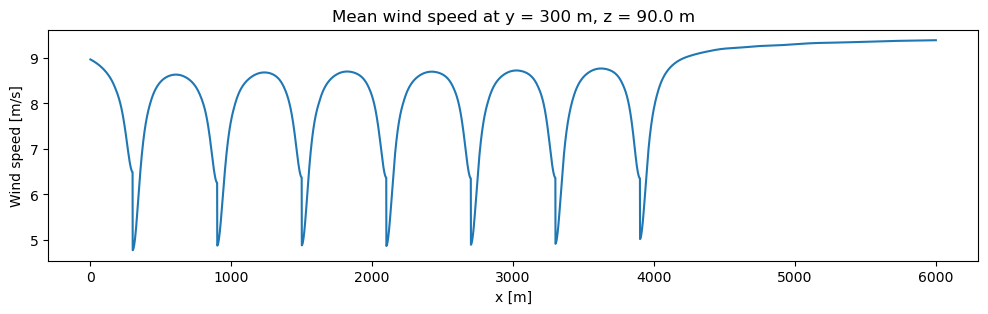

In [32]:
fig, ax = plt.subplots(figsize=(12,3))
ax.plot(points[0, :, 0], point_ws_mean)
ax.set_xlabel("x [m]")
ax.set_ylabel("Wind speed [m/s]")
ax.set_title(f"Mean wind speed at y = {y} m, z = {z} m")
plt.show()

### (4.6) Generating flow images

Often it is nice to have a visualization of the wind flow, including the wakes. This can be done via hte [FlowPlots2D](https://fraunhoferiwes.github.io/foxes.docs/_foxes/output/FlowPlots2D.html) output class. 

This is how you create a visualization of the mean flow field, averaging over all states:

States 'StatesTable_instance1': Reading file c:\Users\nuwaw\miniforge3\envs\wise2024\Lib\site-packages\foxes\data\states\wind_rose_bremen.csv
ProcessEngine: Calculating data at 13776 points for 216 states
ProcessEngine: Computing 4 chunks using 12 processes


100%|██████████| 4/4 [00:10<00:00,  2.68s/it]


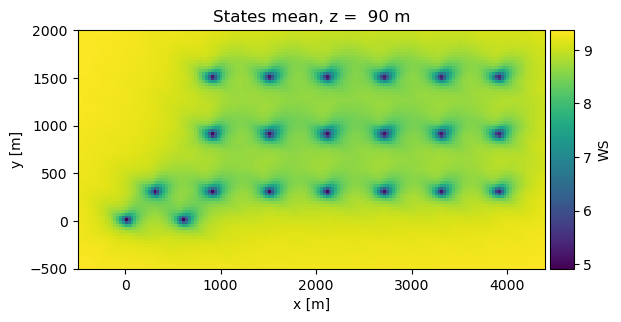

In [33]:
o = foxes.output.FlowPlots2D(algo, farm_results)
o.get_mean_fig_xy(FV.WS, resolution=30)
plt.show()

If you want to look at specific states, that is also possible. For example, picking states 32 and 152 (cf. [wind_rose_bremen.csv](https://github.com/FraunhoferIWES/foxes/blob/main/foxes/data/states/wind_rose_bremen.csv)). The object `g` is a generator here, each call of `next(g)` yields a new figure according to the `states_isel` list:

States 'StatesTable_instance1': Reading file c:\Users\nuwaw\miniforge3\envs\wise2024\Lib\site-packages\foxes\data\states\wind_rose_bremen.csv
ProcessEngine: Calculating data at 123241 points for 2 states
ProcessEngine: Computing 31 chunks using 12 processes


100%|██████████| 31/31 [00:03<00:00,  9.43it/s]


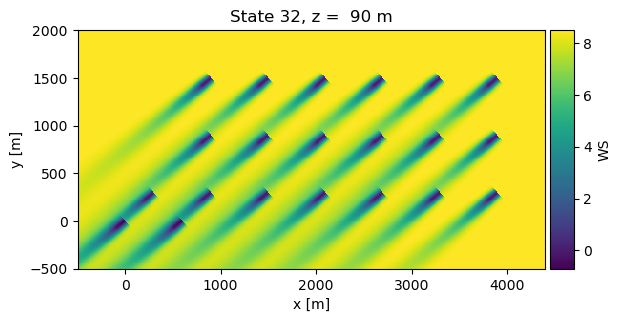

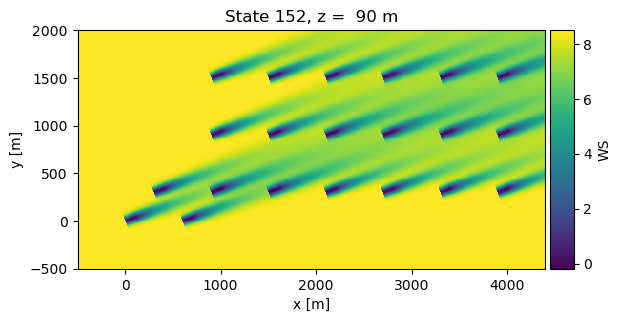

In [34]:
g = o.gen_states_fig_xy(FV.WS, resolution=10, states_isel=[32, 152])
next(g)
plt.show()
next(g)
plt.show()

## (5) Geometrical layout generation

*FOXES* can also be used for wind farm layout optimizaton, see for example [this](https://fraunhoferiwes.github.io/foxes-opt/notebooks/layout_opt.html) part of the documentation. That means moving the wind turbines around until some objective function reaches a maximal (or minimal, for some functions) value, e.g. the wind farm power.

Technically, the optimization part of *FOXES* is its own package, which in turn is coupled to the open-source package [iwopy](https://fraunhoferiwes.github.io/iwopy.docs/index.html), also by Fraunhofer IWES, which is just an interface to powerfull external Python optimization packages. Here we wish to run an example based on [pymoo](https://pymoo.org/), so inside our active Python environment, we have to install these package:

```console
pip install foxes[opt]
pip install pymoo
```

Let's create a shortcut to the relevant sub-package of *FOXES*, and name it `grg`:

In [37]:
import foxes_opt.problems.layout.geom_layouts as grg
from iwopy.interfaces.pymoo import Optimizer_pymoo

ModuleNotFoundError: No module named 'foxes_opt'

In the following, we will simply generate a regular geometrical wind farm layout that consists of a given number of wind turbines within a closed polygon shape. Note that the wind conditions will not influence the result, and neither will the wakes - it is a purely *geometrical* optimization.

First, we specify the corner points of a closed polygon that represents the available wind farm area, and create a boundary object for the area:

In [30]:
corner_points = np.array(
    [[0, 1000], 
     [1400, 2600], 
     [4500, 3100], 
     [4200, 1300]], 
    dtype=np.float64
)
boundary = foxes.utils.geom2d.ClosedPolygon(corner_points)

The so-called optimization problem defines the variables that the optimizer will vary later. Here it is a regular grid of points, whose origin, grid spacing and rotation agains the x-axis are the optimization variables:

In [31]:
D = 126 # the rotor diameter
problem = grg.GeomRegGrid(
    boundary, 
    n_turbines=60,  # the number of turbines to be placed 
    min_dist=2*D,   # the minimal distance between turbines
    #D=D            # this avoids that rotor blades can reach out of area
)

We now add the objective function, which maximizes the grid spacing:

In [32]:
problem.add_objective(grg.MaxDensity(problem, dfactor=2))

Finally, we add a constraint that considers only valid layouts, for which exactly N points lie within the area. Afterwards, the problem setup is complete and we can initialize it:

In [33]:
problem.add_constraint(grg.Valid(problem))
problem.initialize()

Problem 'geom_reg_grid' (GeomRegGrid): Initializing
---------------------------------------------------
  n_vars_int  : 0
  n_vars_float: 5
---------------------------------------------------
  n_objectives: 1
  n_obj_cmptns: 1
---------------------------------------------------
  n_constraints: 1
  n_con_cmptns: 1
---------------------------------------------------
Grid data:
  pmin        = [   0. 1000.]
  pmax        = [4500. 3100.]
  min dist    = 252.0
  max dist    = 4965.883607174054
  n row max   = 22
  n max       = 484


This is what the wind farm area looks like:

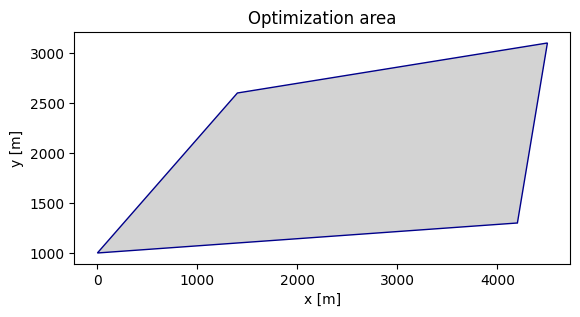

In [34]:
problem.get_fig()
plt.show()

Next, we have to select an optimizer. Here we pick the Genetic Algorithm from `pymoo`, called [GA](https://pymoo.org/algorithms/soo/ga.html):

In [35]:
solver = Optimizer_pymoo(
    problem,
    problem_pars=dict(vectorize=True),
    algo_pars=dict(
        type="GA",
        pop_size=100,  # the number of layouts per generation
        seed=42,       # the random seed, for reproducible results
    ),
    setup_pars=dict(),
    term_pars=dict(n_gen=100),  # the number of generations 
)
solver.initialize()
solver.print_info()

Loading pymoo
pymoo successfully loaded
Initializing Optimizer_pymoo
Selecting sampling: float_random (FloatRandomSampling)
Selecting algorithm: GA (GA)

Problem:
--------
  vectorize: True

Algorithm:
----------
  type: GA
  pop_size: 100
  seed: 42

Termination:
------------
  n_gen: 100



Now let's run the optimization:

In [36]:
results = solver.solve()
solver.finalize(results)

n_gen  |  n_eval  |     cv_min    |     cv_avg    |     f_avg     |     f_min    
     1 |      100 |  3.900000E+01 |  5.779000E+01 |             - |             -
     2 |      200 |  3.900000E+01 |  5.483000E+01 |             - |             -
     3 |      300 |  2.200000E+01 |  5.037000E+01 |             - |             -
     4 |      400 |  0.000000E+00 |  4.296000E+01 |  8.471432E+02 |  8.471432E+02
     5 |      500 |  0.000000E+00 |  3.031000E+01 |  8.257312E+02 |  5.027865E+02
     6 |      600 |  0.000000E+00 |  1.423000E+01 |  8.184791E+02 |  2.828712E+02
     7 |      700 |  0.000000E+00 |  3.3500000000 |  8.467214E+02 |  2.741118E+02
     8 |      800 |  0.000000E+00 |  0.000000E+00 |  8.031133E+02 |  2.477620E+02
     9 |      900 |  0.000000E+00 |  0.000000E+00 |  5.694206E+02 |  2.477620E+02
    10 |     1000 |  0.000000E+00 |  0.000000E+00 |  4.146574E+02 |  2.433698E+02
    11 |     1100 |  0.000000E+00 |  0.000000E+00 |  3.688552E+02 |  2.433698E+02
    12 |     120

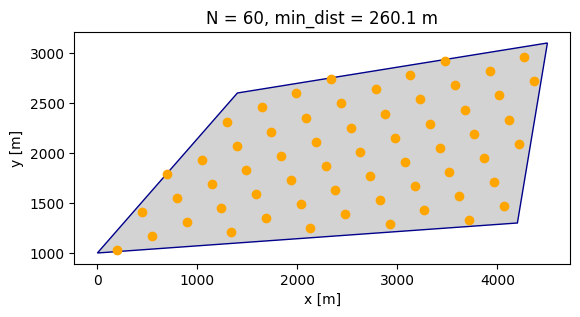

In [37]:
xy, valid = results.problem_results
problem.get_fig(xy, valid)
plt.show()

The list of turbine coordinates is now stored as a numpy array under `xy`.

## (6) More examples

Other examples - for example timeseries inflow data - can be found [here](https://fraunhoferiwes.github.io/foxes.docs/examples.html) in the documentation. The underlying notebooks can be found [here](https://github.com/FraunhoferIWES/foxes/tree/main/notebooks) at GitHub. Additional example scripts that actually are little Python applications are located [here](https://github.com/FraunhoferIWES/foxes/tree/main/examples) for *foxes* and [here](https://github.com/FraunhoferIWES/foxes-opt/tree/main/examples) for *foxes_opt*.

Feel invited to have a look at all those and play around with them - and stay tuned, since *FOXES* is still under rapid development, the code base as well as features and examples may change in the future.